In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load,  encoding="UTF-8")

ride_data = pd.read_csv(ride_data_to_load,  encoding="UTF-8")
# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, how="outer", on="city")
# Display the data table for preview


In [8]:

urban_city = combined_data[combined_data["type"] == "Urban"]

rural_city = combined_data[combined_data["type"] == "Rural"]

suburban_city = combined_data[combined_data["type"] == "Suburban"]

count_rides_urban = urban_city.groupby("city")["type"].count()
crusum = count_rides_urban.sum()

count_rides_rural = rural_city.groupby("city")["type"].count()
crrsum = count_rides_rural.sum()

count_rides_suburban = suburban_city.groupby("city")["type"].count()
crssum = count_rides_suburban.sum()
print(f"Total ride count Urban : {crusum}")

print(f"Total ride count Rural : {crrsum}")

print(f"Total ride count Suburban : {crssum}")

Total ride count Urban : 1625
Total ride count Rural : 125
Total ride count Suburban : 625


In [10]:
avg_fare_urban = urban_city.groupby("city").mean()["fare"]
afumean = avg_fare_urban.mean()

avg_fare_rural = rural_city.groupby("city").mean()["fare"]
afrmean = avg_fare_rural.mean()

avg_fare_suburban = suburban_city.groupby("city").mean()["fare"]
afsmean = avg_fare_suburban.mean()
print(f"Total Avg Fare Urban {afumean} ")

print(f"Total Avg Fare Rural {afrmean} ")

print(f"Total Avg Fare Suburban {afsmean} ")

Total Avg Fare Urban 24.499121716787847 
Total Avg Fare Rural 34.63776503126503 
Total Avg Fare Suburban 30.737298033475952 


In [11]:
count_drivers_urban =  urban_city.groupby("city")["driver_count"].first()
cdusum =count_drivers_urban.sum()

count_drivers_rural =  rural_city.groupby("city")["driver_count"].first()
cdrsum = count_drivers_rural.sum()
count_drivers_suburban = suburban_city.groupby("city")["driver_count"].first()
cdssum= count_drivers_suburban.sum()
print(f"Total driver count Urban: {cdusum}")

print(f"Total driver count Rural: {cdrsum}")

print(f"Total driver count Suburban: {cdssum}")

Total driver count Urban: 2405
Total driver count Rural: 78
Total driver count Suburban: 490


## Bubble Plot of Ride Sharing Data

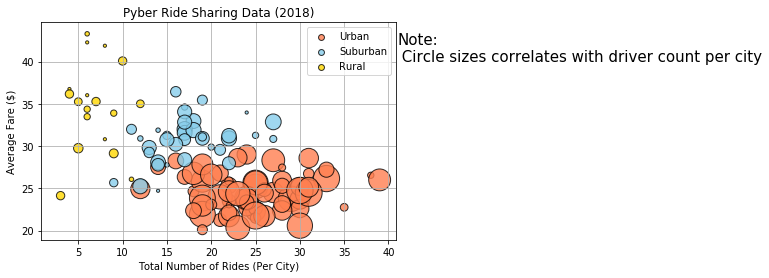

In [15]:
# Obtain the x and y coordinates for each of the three city types

fig = plt.figure(figsize = (14,4))

ax = fig.add_subplot(121)

ax.scatter(count_rides_urban, avg_fare_urban, s = count_drivers_urban*10, marker = "o", label = "Urban",
           color ="coral", alpha =.8, edgecolors = "black", linewidth = 1)

ax.scatter(count_rides_suburban, avg_fare_suburban, s=count_drivers_suburban*10, label = "Suburban",
           marker = "o",color = "skyblue", alpha =.8, edgecolors ="black", linewidth = 1)

ax.scatter(count_rides_rural, avg_fare_rural, s = count_drivers_rural*10 ,marker = "o", label = "Rural", 
           color = "gold", alpha =.8, edgecolors ="black", linewidth=1)

plt.xlabel("Total Number of Rides (Per City)")

plt.ylabel("Average Fare ($)")

plt.title("Pyber Ride Sharing Data (2018)")

lgnd = plt.legend()

lgnd.legendHandles[0]._sizes = [35]

lgnd.legendHandles[1]._sizes = [35]

lgnd.legendHandles[2]._sizes = [35]

plt.grid()

plt.text(41,40,"Note:\n Circle sizes correlates with driver count per city", fontsize=15)

plt.show()

fig.savefig("Avg_fare_per_ride.png")

## Total Fares by City Type

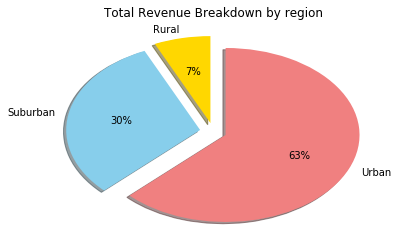

In [18]:
# Calculate Type Percents

per_type_fare = combined_data.groupby(["type"]).sum()["fare"]/combined_data["fare"].sum()*100

label = per_type_fare.index

colors = ["gold", "skyblue","lightcoral"]
# Build Pie Chart

plt.pie(per_type_fare, colors = colors, labels = label, autopct = "%1.0f%%", 
        startangle = 90, explode = [0.1,0.1,0.1])

plt.title("Total Revenue Breakdown by region")

plt.savefig("RevenuebyCityType.png")
# Save Figure


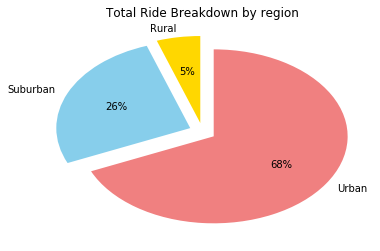

In [23]:
## Total riders by Region

per_type_rides = combined_data.groupby(["type"]).count()["ride_id"]/combined_data["ride_id"].count()*100

label = per_type_rides.index

colors = ["gold", "skyblue","lightcoral"]
plt.pie(per_type_rides, colors = colors, labels = label, autopct = "%1.0f%%", 
        startangle=90, explode=[0.1,0.1,0.1])

plt.title("Total Ride Breakdown by region")

plt.savefig("Rides_by_Region.png")

## Total Drivers by City Type

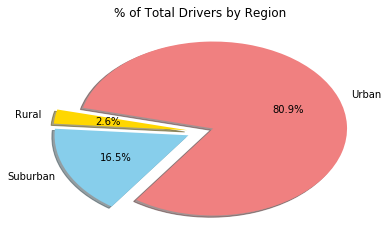

In [21]:
# Calculate Ride Percents

count_drivers_urban_df = pd.DataFrame(count_drivers_urban).reset_index()

sum_urban_drivers = count_drivers_urban_df["driver_count"].sum()

count_drivers_rural_df = pd.DataFrame(count_drivers_rural).reset_index()

sum_rural_drives = count_drivers_rural_df["driver_count"].sum()

count_drivers_suburban_df = pd.DataFrame(count_drivers_suburban ).reset_index()

sum_suburban_drives = count_drivers_suburban_df["driver_count"].sum()
# Build Pie Chart
fig = plt.figure()

labels = ["Urban", "Rural", "Suburban"]

sizes = [sum_urban_drivers, sum_rural_drives, sum_suburban_drives]

colors = ["lightcoral", "gold", "skyblue"]

explode =[0.1,0.1,0.1]

plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct ="%1.1f%%", shadow = True, startangle = 235)

plt.title("% of Total Drivers by Region")

plt.savefig("Total_Drivers_by_Region.png")
# Save Figure


In [27]:
print(f'''
The results of this study show that urban markets make up 68% of total revenue and that rural markets account for less than 10 %. The average fare gives interesting insights into the how the oversaturation of drivers in a given market could have a deflationary result on average wage per trip.
More research will need to be tested to affirm this suspicion. It could also be related to average trip distance/duration. ***Correlation does  not always imply causation ''') 



The results of this study show that urban markets make up 68% of total revenue and that rural markets account for less than 10 %. The average fare gives interesting insights into the how the oversaturation of drivers in a given market could have a deflationary result on average wage per trip.
More research will need to be tested to affirm this suspicion. It could also be related to average trip distance/duration. ***Correlation does  not always imply causation 
